# Introduction

Hey, thanks for viewing my Kernel!

If you like my work, please, leave an upvote: it will be really appreciated and it will motivate me in offering more content to the Kaggle community ! :)

🎉 My 100. notebook! 🎉

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.simplefilter("ignore")
train = pd.read_csv("../input/tabular-playground-series-may-2022/train.csv")
test = pd.read_csv("../input/tabular-playground-series-may-2022/test.csv")
sub = pd.read_csv("../input/tabular-playground-series-may-2022/sample_submission.csv")
display(train.head())
display(test.head())
display(sub.head())

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


,id,target
0,900000,0.5
1,900001,0.5
2,900002,0.5
3,900003,0.5
4,900004,0.5


# Feature Engineering

In [2]:
def create_features(data):
    object_data_cols = [f"f_27_{i+1}" for i in range(10)]
    object_data = pd.DataFrame(data['f_27'].apply(list).tolist(), columns=object_data_cols)
    for feature in object_data_cols:
        object_data[feature] = object_data[feature].apply(ord) - ord('A')
    
    data = pd.concat([data, object_data], 1)
    data["unique_characters"] = data.f_27.apply(lambda s: len(set(s)))
    
    ## sum
    # float
    data['f_sum_2'] = (data['f_21']+data['f_22'])
    data['f_sum_3'] = (data['f_23']-data['f_20'])
    
    continuous_feat = ['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_19', 'f_20', 'f_21', 'f_22', 
                       'f_23', 'f_24', 'f_25', 'f_26', 'f_28']
    
    data['f_sum']  = data[continuous_feat].sum(axis=1)
    data['f_min']  = data[continuous_feat].min(axis=1)
    data['f_max']  = data[continuous_feat].max(axis=1)
    data['f_std']  = data[continuous_feat].std(axis=1)    
    data['f_mad']  = data[continuous_feat].mad(axis=1)
    data['f_mean'] = data[continuous_feat].mean(axis=1)
    data['f_kurt'] = data[continuous_feat].kurt(axis=1)
    data['f_count_pos']  = data[continuous_feat].gt(0).count(axis=1)
    
    # int
    data['f_sum_10'] = (data['f_07']-data['f_10'])
    data['f_sum_13'] = (data['f_08']-data['f_10'])
    
    # 
    data['i_02_21'] = (data.f_21 + data.f_02 > 5.2).astype(int) - (data.f_21 + data.f_02 < -5.3).astype(int)
    data['i_05_22'] = (data.f_22 + data.f_05 > 5.1).astype(int) - (data.f_22 + data.f_05 < -5.4).astype(int)
    i_00_01_26 = data.f_00 + data.f_01 + data.f_26
    data['i_00_01_26'] = (i_00_01_26 > 5.0).astype(int) - (i_00_01_26 < -5.0).astype(int)
    
    return data

In [3]:
train_fe = create_features(train.copy())
test_fe = create_features(test.copy())
train_fe.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_std,f_mad,f_mean,f_kurt,f_count_pos,f_sum_10,f_sum_13,i_02_21,i_05_22,i_00_01_26
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,16.984932,7.934024,4.136964,15.731591,16,-2,2,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,94.428198,44.255341,23.053685,15.986175,16,1,3,0,0,0
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,48.876958,22.895264,-12.437591,15.946423,16,-5,-6,0,0,0
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,52.813264,24.748098,12.841424,15.974522,16,3,2,0,0,0
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,54.338782,25.454841,-13.573071,15.949824,16,-1,-1,0,0,1


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_tr = pd.DataFrame(scaler.fit_transform(train_fe.drop(['id', 'f_27', "target"], 1)), columns=train_fe.drop(['id', 'f_27', "target"], 1).columns)
test_tr = pd.DataFrame(scaler.transform(test_fe.drop(['id', 'f_27'], 1)), columns=train_fe.drop(['id', 'f_27', "target"], 1).columns)
train_tr.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_std,f_mad,f_mean,f_kurt,f_count_pos,f_sum_10,f_sum_13,i_02_21,i_05_22,i_00_01_26
0,-1.374490,0.237914,-0.244425,0.568674,-0.647037,0.839148,0.113849,-0.622798,1.849207,-0.831915,...,-0.845317,-0.851794,0.277786,0.251790,0.0,-0.760856,0.888649,0.020261,-0.010569,-0.059181
1,1.699197,-1.712872,-2.230360,-0.544198,1.113558,-1.552654,0.448561,-0.622798,0.592099,0.999917,...,1.298334,1.300069,1.536681,0.342180,0.0,0.470420,1.307894,0.020261,-0.010569,-0.059181
2,1.683885,0.616078,-1.028335,0.811719,-0.608415,0.113695,-0.707992,-0.622798,-1.293562,-0.221304,...,0.037463,0.034587,-0.825239,0.328066,0.0,-1.992133,-2.465314,0.020261,-0.010569,-0.059181
3,-0.118017,-0.589476,-0.805398,2.087827,0.371515,-0.129132,-0.281882,0.584807,-0.036455,-0.831915,...,0.146421,0.144359,0.857062,0.338042,0.0,1.291271,0.888649,0.020261,-0.010569,-0.059181
4,1.150047,-0.177876,-0.665703,-1.099783,0.468368,0.499896,0.408249,0.584807,0.592099,-1.442525,...,0.188648,0.186230,-0.900804,0.329273,0.0,-0.350431,-0.369087,0.020261,-0.010569,3.442856


# Modeling

In [5]:
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer._decayed_lr(tf.float32) # I use ._decayed_lr method instead of .lr
    return lr

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import Dense, Input, InputLayer, Add, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import clone_model

initial_learning_rate = 0.01
n_epoch = 200

features = train_fe.drop(['id', 'f_27', 'target'], 1).columns
def tf_model():
    activation = 'swish'
    inputs = Input(shape=(len(features)))
    x = Dense(128, kernel_regularizer=tf.keras.regularizers.l2(30e-6),
              activation=activation,
             )(inputs)
    #x = Dropout(0.25)(x)
    x = Dense(64, kernel_regularizer=tf.keras.regularizers.l2(30e-6),
              activation=activation,
             )(x)
    #x = Dropout(0.25)(x)
    x = Dense(64, kernel_regularizer=tf.keras.regularizers.l2(30e-6),
              activation=activation,
             )(x)
    #x = Dropout(0.25)(x)
    x = Dense(32, kernel_regularizer=tf.keras.regularizers.l2(30e-6),
              activation=activation,
             )(x)
    #x = Dropout(0.25)(x)
    x = Dense(16, kernel_regularizer=tf.keras.regularizers.l2(30e-6),
              activation=activation,
             )(x)
    x = Dense(8, kernel_regularizer=tf.keras.regularizers.l2(30e-6),
              activation=activation,
             )(x)
    #x = Dropout(0.25)(x)
    x = Dense(1, #kernel_regularizer=tf.keras.regularizers.l2(1e-6),
              activation='sigmoid',
             )(x)
    model = Model(inputs, x)
    
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                    initial_learning_rate,
                    decay_steps=n_epoch/2,
                    decay_rate=0.995,
                    staircase=True)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule, clipnorm=0.1)
    lr_metric = get_lr_metric(optimizer)
    
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.BinaryCrossentropy(), metrics=[lr_metric])
    return model

2022-05-09 09:51:04.952158: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


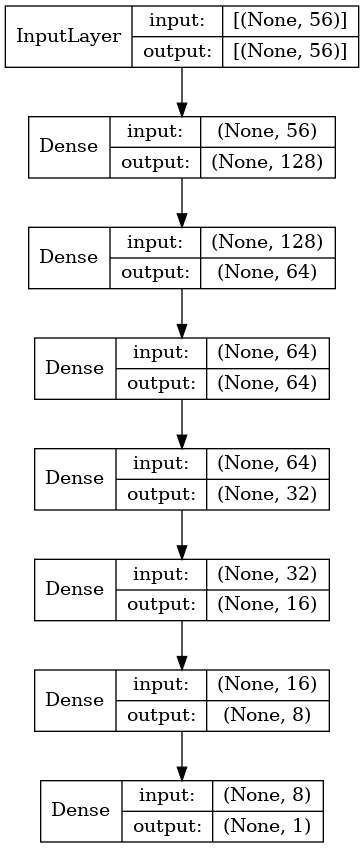

In [7]:
plot_model(tf_model(), show_layer_names=False, show_shapes=True)

# Automated Blending Function

In [8]:
def automated_blending(model_ori, X, y, X_test, nfold=10, plot=True, figsize=(16, 8), tf=False, verbose=0):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.base import clone
    from sklearn.metrics import roc_auc_score
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    
    train_preds = []
    train_targets = []
    auc = []
    skf = StratifiedKFold(n_splits=nfold)
    test_preds = 0
    if tf:
        ncols=5
        nrows=round(nfold/ncols)
        fig, axes = plt.subplots(nrows, ncols, figsize=(16, round(nrows*16/ncols)))
        col_i, row_i = 0, 0
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1},", end=' ')
        X_train, X_valid = X.iloc[train_idx, :], X.iloc[test_idx, :]
        y_train, y_valid = y.iloc[train_idx, :], y.iloc[test_idx, :]
        
        if tf:
            model = model_ori()
        else:
            model = clone(model_ori)
            
        try:
            if tf:
                es = EarlyStopping(monitor="val_loss",
                                   patience=24, 
                                   verbose=verbose,
                                   mode="min", 
                                   restore_best_weights=True)
                callbacks = [es]
                history = model.fit(X_train, y_train, 
                                    validation_data=(X_valid, y_valid), 
                                    epochs=n_epoch,
                                    verbose=verbose,
                                    batch_size=4096,
                                    shuffle=True,
                                    callbacks=callbacks)
                preds = model.predict(X_valid)
                pd.DataFrame(history.history, columns=["loss", "val_loss"]).plot(ax=axes[row_i][col_i])
                col_i += 1
                if col_i == ncols:
                    col_i = 0
                    row_i += 1
            else:
                model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=20, verbose=verbose)
                preds = model.predict_proba(X_valid)
        except:
            print("Warnings, model has not eval func...")
            model.fit(X_train, y_train)
            preds = model.predict_proba(X_valid)
        
        if tf:
            auc_score = roc_auc_score(y_valid.values, preds)

            auc.append(auc_score/nfold)
            train_preds.extend(preds[:, 0])
            train_targets.extend(y_valid.values)

            tpreds = model.predict(X_test)
            test_preds += tpreds/nfold
        else:
            auc_score = roc_auc_score(y_valid.values, preds[:, 1])

            auc.append(auc_score/nfold)
            train_preds.extend(preds[:, 1])
            train_targets.extend(y_valid.values)

            tpreds = model.predict_proba(X_test)
            test_preds += tpreds[:, 1]/nfold
        print(f'auc: {round(auc_score, 5)}')
    
    print(f"auc mean: {sum(auc)}")
    df_preds = pd.DataFrame()
    df_preds['pred'] = train_preds
    df_preds['label'] = np.array(train_targets).reshape(-1)
    
    zero_mean = df_preds.loc[df_preds['label']==0, 'pred'].mean()
    zero_median = df_preds.loc[df_preds['label']==0, 'pred'].median()
    
    one_mean = df_preds.loc[df_preds['label']==1, 'pred'].mean()
    one_median = df_preds.loc[df_preds['label']==1, 'pred'].median()
    
    
    if plot:
        fig, ax = plt.subplots(figsize=figsize)
        palette ={0: "blue", 1: "red"}
        sns.kdeplot(data=df_preds, x='pred', hue='label', ax=ax, palette=palette)
        plt.axvline(x=zero_mean, color='blue', label=f'mean-zero-{round(zero_mean, 3)}', ls='--')
        plt.axvline(x=zero_median, color='blue', label=f'median-zero-{round(zero_median, 3)}', ls=':')
        
        plt.axvline(x=one_mean, color='red', label=f'mean-one-{round(one_mean, 3)}', ls='--')
        plt.axvline(x=one_median, color='red', label=f'median-one-{round(one_median, 3)}', ls=':')
        plt.legend()
        plt.show()
    
    return test_preds

Fold: 1, 

2022-05-09 09:51:09.044273: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


auc: 0.99802
Fold: 2, auc: 0.99776
Fold: 3, auc: 0.99781
Fold: 4, auc: 0.99774
Fold: 5, auc: 0.99805
Fold: 6, auc: 0.99789
Fold: 7, auc: 0.99768
Fold: 8, auc: 0.99799
Fold: 9, auc: 0.99785
Fold: 10, auc: 0.99787
Fold: 11, auc: 0.99784
Fold: 12, auc: 0.99783
Fold: 13, auc: 0.99794
Fold: 14, auc: 0.99793
Fold: 15, auc: 0.99789
auc mean: 0.9978725404442385


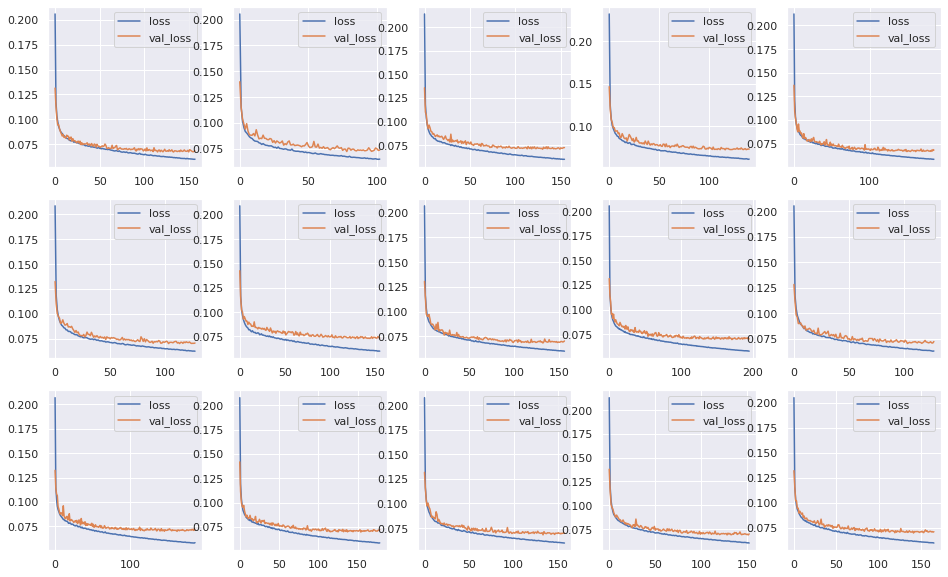

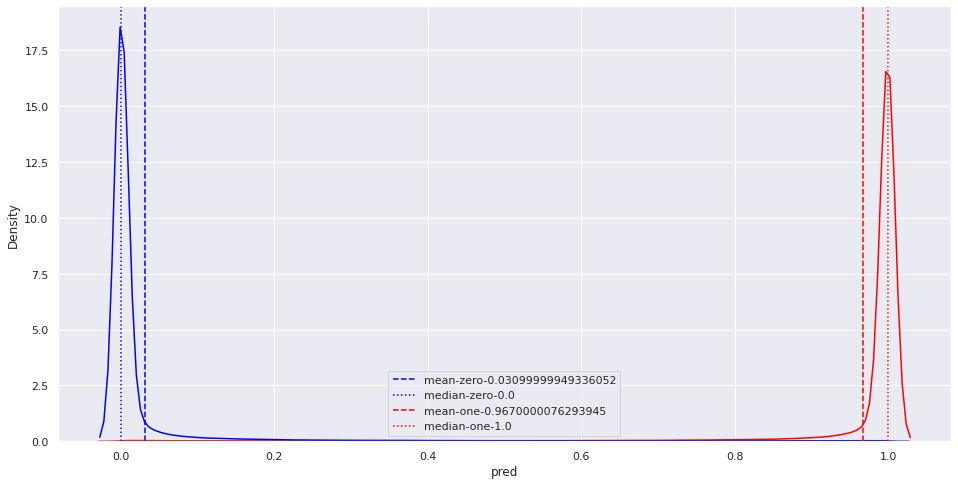

In [9]:
from lightgbm import LGBMClassifier

test_preds = automated_blending(tf_model, 
                                train_tr, train_fe[['target']], 
                                test_tr, nfold=15, tf=True, verbose=0)

In [10]:
pre_sub1 = pd.read_csv("../input/tpsmay22-keras-quickstart/submission.csv")
pre_sub2 = pd.read_csv("../input/tps-may22-eda-neuronal-nets/my_submission_050722.csv")

In [11]:
import scipy
pre_sub2['target'] = scipy.stats.rankdata(pre_sub2['target'])
sub['target'] = scipy.stats.rankdata(test_preds)
sub['target'] = sub['target'] * 1 + pre_sub1['target'] * 0 + pre_sub2['target'] * 0
sub.to_csv("submission.csv", index=False)

In [12]:
sub.head()

,id,target
0,900000,596182.0
1,900001,612495.0
2,900002,2636.0
3,900003,151623.0
4,900004,479378.5


# References
1. [notebook](https://www.kaggle.com/code/ambrosm/tpsmay22-keras-quickstart/notebook?scriptVersionId=94617937)
2. [notebook](https://www.kaggle.com/code/cv13j0/tps-may22-eda-neuronal-nets/notebook?scriptVersionId=95032660)